## 2D Terzaghi Exact Solution

*Using second order central-difference method*

In [5]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt

# Consolidation coefficients
cx = 0.7
cz = 1.1

N = 50
Nx = Nz = N
Nt = 5000 # 21600 used

x_range = np.linspace(0, 4, Nx)
z_range = np.linspace(0, 4, Nz)
t_range = np.linspace(0, 1, Nt)

Delta_x = x_range[1] - x_range[0]  # Grid spacings
Delta_z = z_range[1] - z_range[0]
Delta_t = t_range[1] - t_range[0]  # Time step

# Define the directory to save the pore pressure data
save_directory = r'C:\Users\Umar\OneDrive\UROP_PINNs\Terzaghi\Forward\Data'
os.makedirs(save_directory, exist_ok=True)

# Initial condition
u_0 = 1.0  # Initial excess pore water pressure

# Initialize pore water pressure array
u = np.zeros((len(x_range), len(z_range), len(t_range)))

# Apply initial condition
u[:, :, 0] = u_0

# Start time for progress tracking
start_time = time.time()

# Time-stepping loop
# Format T, X, Z
for n in range(0, len(t_range) - 1):
    for i in range(1, len(x_range) - 1):
        for k in range(1, len(z_range) - 1):
            u[i, k, n + 1] = u[i, k, n] + Delta_t * (
                cx * (u[i + 1, k, n] - 2 * u[i, k, n] + u[i - 1, k, n]) / Delta_x**2 +
                cz * (u[i, k + 1, n] - 2 * u[i, k, n] + u[i, k - 1, n]) / Delta_z**2
            )

    # Apply boundary conditions for the 2D Terzaghi problem
    u[:, -1, n + 1] = 0  # u(t, x, z)|z=4 = 0
    u[-1, :, n + 1] = 0  # u(t, x, z)|x=4 = 0
    u[:, 0, n + 1] = u[:, 1, n + 1]  # ∂u(t, x, z)/∂z|z=0 = 0
    u[0, :, n + 1] = u[1, :, n + 1]  # ∂u(t, x, z)/∂x|x=0 = 0
    
    # Print progress every 1000 time steps
    if (n + 1) % 1000 == 0:
        elapsed_time = time.time() - start_time
        remaining_time = elapsed_time * (len(t_range) - n - 1) / (n + 1)
        progress_message = f"Time step {n + 1}/{len(t_range) - 1} completed. Estimated time remaining: {remaining_time:.2f} seconds"
        print(progress_message)

# Save pore pressure data to a file after completing the simulation
np.save(os.path.join(save_directory, '2D_TL_test.npy'), u)

print("Simulation completed.")

Time step 1000/4999 completed. Estimated time remaining: 15.44 seconds
Time step 2000/4999 completed. Estimated time remaining: 11.63 seconds
Time step 3000/4999 completed. Estimated time remaining: 7.75 seconds
Time step 4000/4999 completed. Estimated time remaining: 3.88 seconds
Simulation completed.


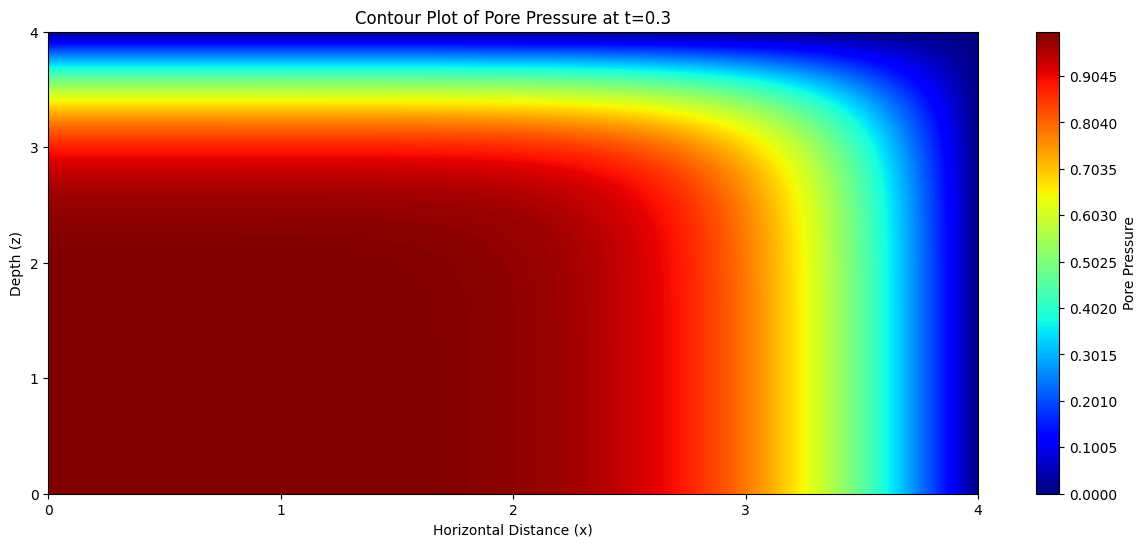

In [ ]:
# Function to plot contour plot
def plot_contour_at_time(t_index, time_value):
    fig, ax = plt.subplots(1, 1, figsize=(15, 6))
    
    # Prepare the mesh grid for contour plotting
    X, Z = np.meshgrid(x_range, z_range, indexing='ij')
    
    # Extract the pore pressure at the specified time
    u_t = u[:, :, t_index]
    
    # Create a contour plot
    contour = ax.contourf(X, Z, u_t.T, cmap='jet', levels=900)
    
    ax.set_xlabel('Horizontal Distance (x)')
    ax.set_ylabel('Depth (z)')
    ax.set_title(f'Contour Plot of Pore Pressure at t={time_value}')
    ax.set_xticks(np.arange(0, 5, 1))
    ax.set_yticks(np.arange(0, 5, 1))
    
    # Adding a color bar to indicate pressure levels
    cbar = fig.colorbar(contour, ax=ax)
    cbar.set_label('Pore Pressure')
    plt.savefig(f'ContourPlot_t={time_value}.png', dpi=600)
    plt.show()

# Find the indices for the specific times
times = [0.3, 0.8]
time_indices = [int(t * (Nt-1)) for t in times]

# Plot contour plots for specified times
for t_index, time_value in zip(time_indices, times):
    plot_contour_at_time(t_index, time_value)